Displaying plot 1 - INITIAL GUESS


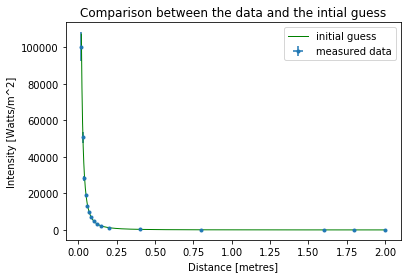


Goodness of fit - chi square measure:
Chi2 = 20.57386709934276, Chi2/dof = 1.46956193566734

Fit parameters:
Intensity of Lamp = 4.729e+01 +/- 6.803e-02
Length of Filament = 2.407e-02 +/- 6.817e-03


<Figure size 432x288 with 0 Axes>

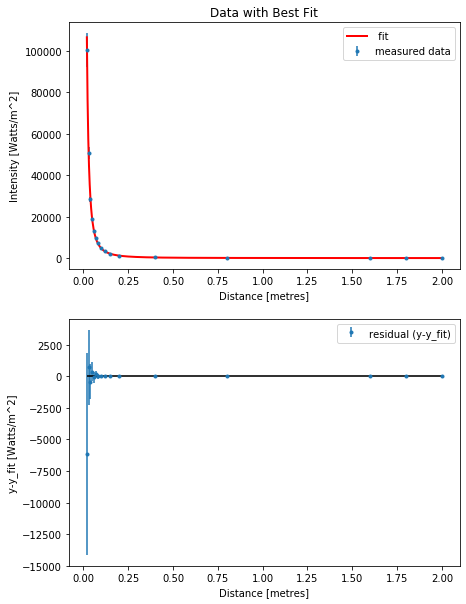

In [1]:
# code for non-linear fit to light intensity data.
# code includes:
#   revised model for near-field effects
#   incorporation of x-uncertainty into an effective total y-unertainty
#   options for adjusting plotting limits

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#LIST OF ALL INPUTS

# fname is assumed to be a .csv file (comma separated values). All rows 
# containing non-number text (example: names for each column) must begin 
# with "#". By default, the oscilloscope generates text column names 
# without "#"--it must be added manually. The .csv file must be in the same 
# folder as this fit program, otherwise the full file extension must be added
# to fname: e.g. fname = 'folder/subfolder/subsubfolder/file.csv'
fname = 'test_data_light_intensity_nonlinear.csv'
# the data file fname has x data (first column) and y data (third column) and 
# the uncertianty in x and y (second and fourth column).
# Enter the name and units of each column here so that the plots are properly
# labeled. e.g. x_name = 'Time', x_units = 'ms', y_name = 'Voltage', y_units
# = 'V'.
x_name = 'Distance'
x_units = 'metres'
y_name = 'Intensity'
y_units = 'Watts/m^2'
# it is often necessary to provide good initial guesses for the parameters in order 
# for the chi2 fit to be converge correctly. 
#The first parameter is the overall light intensity, which you can estimate from previous fits. 
#The second is the estimate of the length of the filament in metres. If the guesses are 
#not good  the fitting routine  may not converge on the global minimum in Chi^2.  
#once you have a best fit, re-run the code again with the best fit parameters replacing the initial guesses.
#This will refine the fit because the x-uncertainty below is incorporated into the y-uncertinty using the guesses
guesses = (50., 0.03)
###############################################################################
# loads data, plots guessed curve
###############################################################################

# definition of the fit function
def fit_function(x, k, l):
    return  2*k/l*np.arctan(l/(2*x))/x
   
#load the file "fname", defined above
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(0,1,2,3))
# access the data columns and assign variables x,y  and  y_sigma
x = data[:,0]
y = data[:,2]
x_sigma = data[:,1]
# measured y uncertianty
# y_sigma = data[:,3]

# we will incorporate the x uncertainty into a total y uncertainty,
# which requires calculation of the derivative of the fit function
dydx = guesses[0]/(data[:,0]*((guesses[1]/2.0)**2 + data[:,0]**2))

#the total y uncertainty is the sum (in quadrature) of the measured y uncertainty
# and the x uncertainty times the derivative of the model.
# Note, the whole fit should be iterated if your initial guess is far off of the final fit values
y_sigma = np.sqrt((data[:,3])**2+dydx**2*data[:,1]**2)

# define an array of points  used or plotting the theory function
x_fitfunc=np.linspace(min(x),max(x),1000)


#compares the guessed curve to the data for visual reference
y_guess = fit_function(x_fitfunc,*guesses)
plt.errorbar(x,y,xerr=x_sigma,yerr=y_sigma,marker='.',linestyle='',label="measured data")
plt.plot(x_fitfunc,y_guess,marker="",linestyle="-",linewidth=1,color="g",
         label="initial guess")
# plt.xlim(0,1)
plt.xlabel('{} [{}]'.format(x_name,x_units))
plt.ylabel('{} [{}]'.format(y_name,y_units))
plt.title('Comparison between the data and the intial guess')
plt.legend(loc='best',numpoints=1)
print ('Displaying plot 1 - INITIAL GUESS')
plt.show()
plt.figure()
   
    
# fit the data to fit_function. fit_params is the resultant parameters, fit_cov
# is the covariance matrix between all the parameters. maxfev=10**5 means the
# fitting procedure is iterated at maximum 10^5 times before giving up.
fit_params,fit_cov = curve_fit(fit_function,x,y,sigma=y_sigma,p0=guesses,
                               maxfev=10**5)
                               
###############################################################################
# prints the chi2 
###############################################################################

# function that  calculates the chi square value of a fit
def chi_square (fit_parameters, x, y, sigma):
#
    return np.sum((y-fit_function(x, *fit_parameters))**2/sigma**2)
    
# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params,x,y,y_sigma)
dof = len(x) - len(fit_params)
print ("\nGoodness of fit - chi square measure:")
print ("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

###############################################################################
# prints the fit parameters (with uncertainty)
###############################################################################

# the covariance matrix is rescaled to cancel the inverse scaling that is 
# performed for numerical reasons during execution of curve_fit -- do not 
# change this line!
fit_cov = fit_cov*dof/chi2
# calculate the standard deviation as uncertainty of the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# read out parameter results
param_names = ['Intensity of Lamp','Length of Filament']
print ("Fit parameters:")
for i in range(len(fit_params)):
    print ('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# prints out the covariance between all variables. Uncomment this code to see
# the results of this more sophisticated statistical measure.
#print "\nCovariance between fit parameters:"
#for i,fit_covariance in enumerate(fit_cov):
#    for j in xrange(i+1,len(fit_covariance)) :
#        print "{} and {} : {:.3e}".format(param_names[i],
#                                          param_names[j],
#                                          fit_cov[i,j])
                                                                        




      
###############################################################################
# plots the data and the fit curve, plus a plot of residuals
###############################################################################
# code is set to make a dual plot with plot1 showing data and best fit model, plot2 showing residuals

# y_fitfunc is the curve using the parameters calculated from the fit
#x_fit = np.linspace(min(f),max(f),len(f))
y_fitfunc = fit_function(x_fitfunc, *fit_params)
# plots y, and y_fit on the same plot.
# marker='.' : data points are not indicated by markers
# linestyle= '-' : a continuous line is drawn
# linewidth=2 : the line thickness is set to 2
# color='r' : the color of the line is set to red
# label=string : the string is shown in the legend

fig=plt.figure(figsize=(7,10))

# plot the data and best fit
plot1=fig.add_subplot(2,1,1)
plot1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="measured data")
plot1.plot(x_fitfunc,y_fitfunc,marker="",linestyle="-",linewidth=2,color="r",
         label=" fit")
# add axis labels and title
plot1.set_xlabel('{} [{}]'.format(x_name,x_units))
plot1.set_ylabel('{} [{}]'.format(y_name,y_units))
plot1.set_title('Data with Best Fit')
# set the x and y boundaries of your plot
#plot1.xlim(lower_x,upper_x)
#plot1.ylim(lower_y,upper_y)
# show a legend. loc='best' places legend where least amount of data is 
# obstructed. 
plot1.legend(loc='best',numpoints=1)


# residual is the difference between the data and theory
y_fit=fit_function(x,*fit_params)
residual = y-y_fit
#calculate normalized residuals
normresidual=residual/y_sigma

# this code plots the residuals
plot2 = fig.add_subplot(212)
plot2.errorbar(x,residual,yerr=y_sigma,marker='.',linestyle='',
             label="residual (y-y_fit)")
plot2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
plot2.set_xlabel('{} [{}]'.format(x_name,x_units))
plot2.set_ylabel('y-y_fit [{}]'.format(y_units))
plot2.legend(loc='best',numpoints=1)




plt.show()